In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [28]:

# Đọc dữ liệu từ file CSV
df=pd.read_csv("data.csv", encoding='latin-1', sep=";")

# Giả sử dữ liệu chuỗi thời gian nằm trong cột 'value'
data = df.iloc[ 2151091405 % 16 + 1]
data.head()

0     964.4
1    1019.7
2     988.4
3    1010.8
4    1061.5
Name: 14, dtype: float64

In [29]:
# Chuyển đổi cột 'date' sang datetime
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

# Trích xuất ngày, tháng, năm
data['day'] = data['Ngày'].dt.day
data['month'] = data['Ngày'].dt.month
data['year'] = data['Ngày'].dt.year

# Chuyển đổi sang định dạng số float nếu cần thiết
data['day'] = data['day'].astype(float)
data['month'] = data['month'].astype(float)
data['year'] = data['year'].astype(float)

KeyError: 'Ngày'

In [ ]:
# Khởi tạo mô hình HMM với 3 trạng thái ẩn
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(data)

GaussianHMM(covariance_type='full', n_components=3, n_iter=100)

In [ ]:
# Dự đoán các trạng thái ẩn
hidden_states = model.predict(data)

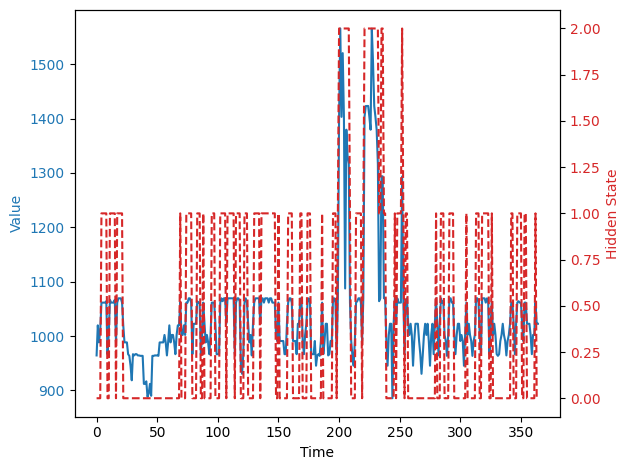

In [ ]:

# Vẽ biểu đồ dữ liệu chuỗi thời gian và các trạng thái ẩn
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Value', color=color)
ax1.plot(df.index, data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Hidden State', color=color)
ax2.plot(df.index, hidden_states, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
# In ra các trạng thái ẩn dự đoán
print("Trạng thái ẩn dự đoán:")
print(hidden_states)

Trạng thái ẩn dự đoán:
[0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 2 2 2 2 2 2 2 2 2 1 0 0 0 0 1 1 1 1 1 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 2 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
